Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [ ]:
NAME = "Anamarija Hauptman"
COLLABORATORS = ""

---

# Domača naloga 2: Sivinske preslikave slik
1. Napišite funkcijo `makeNegativeImage`, ki preslika najtemnejšo vrednost na sliki v najsvetlješo vrednost na sliki in obratno. Preslikava naj bo linearna: $s(x, y) = a r(x, y) + b$. Funkcija naj sprejeme sliko in vrne preslikano sliko. Tako preslikano sliko imenujemo *negativ*.

In [2]:
# naložite module
#import rvlib as rv
import numpy as np
import PIL.Image as Image
import matplotlib.pyplot as plt
from nose.tools import assert_equal, assert_almost_equal

In [5]:
def makeNegativeImage(image):
    #your code here
    negative_image = np.zeros_like(image)
    negative_image[:, :] = 255 - image[:, :]
    return negative_image

In [6]:
test_image = (np.random.rand(32, 32) * 256).astype('uint8')
test_negative = makeNegativeImage(test_image)
max_ix_orig = np.argmax(test_image)
min_ix_orig = np.argmin(test_image)
max_ix_neg = np.argmax(test_negative)
min_ix_neg = np.argmin(test_negative)
# Indeks najmanjše vrednosti v začetni sliki mora biti enak indeksu največje vrednosti v preslikani sliki
assert_equal(max_ix_orig, min_ix_neg)
# In obratno
assert_equal(min_ix_orig, max_ix_neg)
# Seštevek originalne in preslikane slike mora biti slika, v kateri imajo vsi elementi vrednost 255
assert(np.all(test_image + test_negative == 255))

2.  1. Napišite funkcijo `window_middle80_parameters`, ki izračuna vrednosti parametrov $c$ in $w$ sivinskega oknjenja tako, da iz slike odstrani 10% najtemnejših in 10% najsvetlejših slikovnih elementov. Funkcija naj vrne tuple parametrov $c$ in $w$: `(c, w)`.
    2. Z dobljenimi parametri nato izračunajte oknjeno sliko in jo narišite.

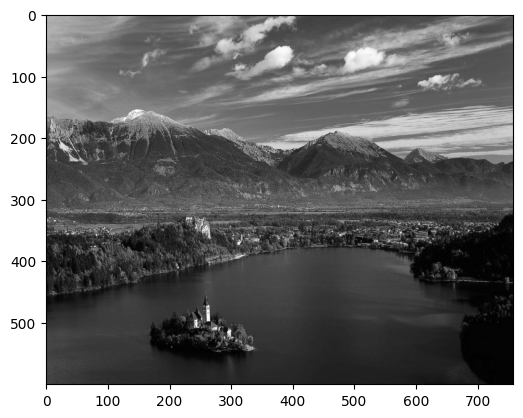

In [30]:
# Implementirajte funkcijo
def window_middle80_parameters(image):
    #Xour code here
    pix_no = image.shape[0] * image.shape[1]
    image_1d = np.reshape(image, [1, pix_no])
    image_1d = np.sort(image_1d)
    min_v = image_1d[0, int(0.1 * pix_no) + 1]
    max_v = image_1d[0, int(0.9 * pix_no) - 1]
    w = (max_v - min_v) / 2
    c = min_v + w
    return c, w

def scaleImage(iImage, iSlopeA, iIntersectionB):
    dtype = iImage.dtype
    oImage = iImage * iSlopeA + iIntersectionB
    if dtype.kind in ('i', 'u'):
        oImage = np.clip(oImage, np.iinfo(dtype).min, np.iinfo(dtype).max)
    return oImage.astype(dtype)

def windowImage(iImage, iCenter, iWidth):
    dtype = iImage.dtype
    if dtype.kind in ('i', 'u'):
        iRange = np.iinfo(dtype).max - np.iinfo(dtype).min
    else:
        iRange = iImage.max() - iImage.min()
    iSlope = iRange / iWidth
    iIntersection = -iSlope * (float(iCenter) - iWidth / 2)
    return scaleImage(iImage, iSlope, iIntersection)

def showImage(image, iTitle=''):
    plt.figure()
    plt.imshow(image, cmap='gray')
    plt.title(iTitle)
    plt.show()

def convertToGray(image):
    #your code here:
    oImage = np.zeros((image.shape[0], image.shape[1]))
    oImage[:, :] = (0.299 * image[:, :, 0] + 0.587 * image[:, :, 1] + 0.114 * image[:, :, 2]).astype(np.uint8)
    return oImage

slika = Image.open("./data/slika.jpg")
slika = np.array(slika)
slika_siva = convertToGray(slika)
c, w = window_middle80_parameters(slika_siva)
showImage(windowImage(slika_siva, c, w))

In [23]:
# Testi funkcije window_middle80_parameters
test_image = np.zeros((10, 10), dtype='uint8')
test_image[0, 0] = 127
test_image[:, 1:-1] = 127
test_image[:, -1] = 255
test_image[-1, -1] = 127
c, w = window_middle80_parameters(test_image)
assert_almost_equal(c, 127)
assert_almost_equal(w, 0)

3. 1. Napišite funkcijo ki določi prag $t$ za funkcijo upragovljanja tako, da bo natanko 50% najsvetlejših slikovnih elementov v vhodni sivinski sliki nad tem pragom. 
   2. Upragovljeno sliko prikažite.

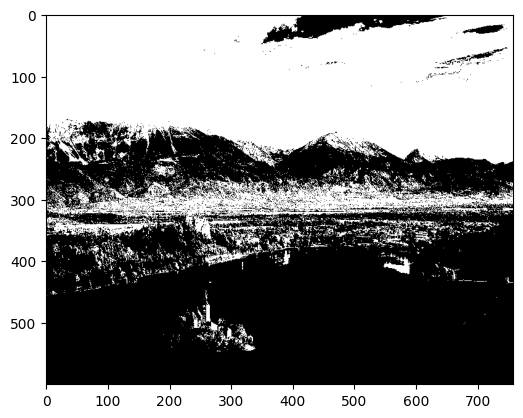

In [36]:
# Implementirajte funkcijo
def calculate_threshold50(image):
    #your code here
    avg_px_val = np.mean(image)
    return avg_px_val

def thresholdImage(iImage, iThreshold):
    dtype = iImage.dtype
    #oImage = np.where(iImage > iThreshold, np.iinfo(dtype).max, 0)
    oImage = 255 * np.array(iImage > iThreshold, dtype=np.uint8)
    return oImage

threshold = calculate_threshold50(slika_siva)
showImage(thresholdImage(slika_siva, threshold))

In [37]:
test_image = np.ones((10, 10))
test_image[:, :5] = 0
threshold = calculate_threshold50(test_image)
assert(threshold > 0)
assert(threshold < 1)

4. 1. Napišite funkcijo `calculate_gamma_image` za gama sivinsko preslikavo $RGB$ barvne slike tako, da sliko najprej pretvorite v $HSV$ barvni prostor, nato izvedite gama preslikavo nad komponento $V$, in $HSV$ sliko pretvorite nazaj v $RGB$ barvni prostor. 

   2. Prikažite primera gama preslikanih barvnih slik za $\gamma < 1$ in $\gamma > 1$. 

   3. Ali ima tak način gama preslikave barvne slike enak vpliv na kontrast kot v primeru sivinske slike?

In [ ]:
# Implementirajte funkcijo
def calculate_gamma_image(image, gamma):
    image_hsv = rv.convertRGB2HSV(image)
    v = image_hsv[:,:,2]
    v_gamma = rv.gammaImage(v, iGamma=gamma)
    gamma_image_hsv = image_hsv
    gamma_image_hsv[:,:,2] = v_gamma
    gamma_image = rv.convertHSV2RGB(gamma_image_hsv)
    return gamma_image

    C. Ali ima tak način gama preslikave barvne slike enak vpliv na kontrast kot v primeru sivinske slike?

5. 1. Napišite funkcijo za preslikavo barvne slike v sivinsko sliko tako, da v HSV barvnem prostoru komponento barvnega nasičenja postavite na 0. 
   2. Prikažite pridobljeno sivinsko sliko.

In [ ]:
# Implementirajte funkcijo
def convert_to_gray_hsv(image):
    #your code here

6. Potrdite, da v barvni sliki "./data/slika.jpg" prevladuje modra barva tako, da izračunate in izpišete razmerje med številom pikslov, ki predstavljajo modre odtenke, in številom vseh pikslov na sliki. Za modre odtenke vzemite piksle katerih vrednost H komponente je na območju $240 \pm 30$ stopinj.

In [46]:
import cv2

image = Image.open("./data/slika.jpg")
image = np.array(image)
image_hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
h_component = image_hsv[:, :, 0]
indices = np.where((h_component[:, :] >= 210) & (h_component[:, :] <= 270))
blue_px = len(indices)
all_px = image_hsv.shape[0] * image_hsv.shape[1]
print(blue_px, all_px)
print(indices)
print(image_hsv[:,:,0])

2 454800
(array([], dtype=int64), array([], dtype=int64))
[[ 99  99  99 ... 104 104 104]
 [ 99  99  99 ... 104 104 104]
 [ 99  99  99 ... 104 104 104]
 ...
 [105 105 105 ...  75  75  75]
 [105 105 105 ...  75  75  75]
 [105 105 105 ...  75  75  75]]
0
